In [1]:
import pandas as pd
import numpy as np


In [2]:
housing=pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Create a test set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=27) # random_state: reproducibility


print(housing.shape)
print(train_set.shape)
print(test_set.shape)


(1460, 81)
(1168, 81)
(292, 81)


In [6]:
housing = train_set.copy() 

In [7]:
# List columns having null values
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1128 to 1043
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    971 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overa

In [8]:
## Check the statistical descriptions of all the numerical features in the dataset (e.g. mean value, standard deviation, minimum value, maximum value, etc

housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,971.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,728.884418,57.148973,69.945417,10465.034247,6.114726,5.562500,1971.545377,1984.834760,103.492679,436.343322,...,92.881849,47.583048,21.516267,3.825342,15.038527,2.535103,50.453767,6.292808,2007.821062,182039.881849
std,420.109438,42.457258,23.097644,9369.678334,1.392422,1.098194,30.088723,20.694603,182.719288,459.829065,...,124.104773,65.555500,59.825351,31.623215,54.818367,39.148812,552.238771,2.718413,1.331705,79847.238076
min,5.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,361.500000,20.000000,60.000000,7559.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,2007.000000,130000.000000
50%,733.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,376.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164600.000000
75%,1086.250000,70.000000,80.000000,11754.250000,7.000000,6.000000,2001.000000,2004.000000,160.000000,704.250000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214925.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,857.000000,523.000000,386.000000,508.000000,440.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# In which year was the first house sale made: 2006

In [ ]:
# In which year was the latest house sale made: 2010

In [ ]:
# When was the oldest house in the dataset built 1168

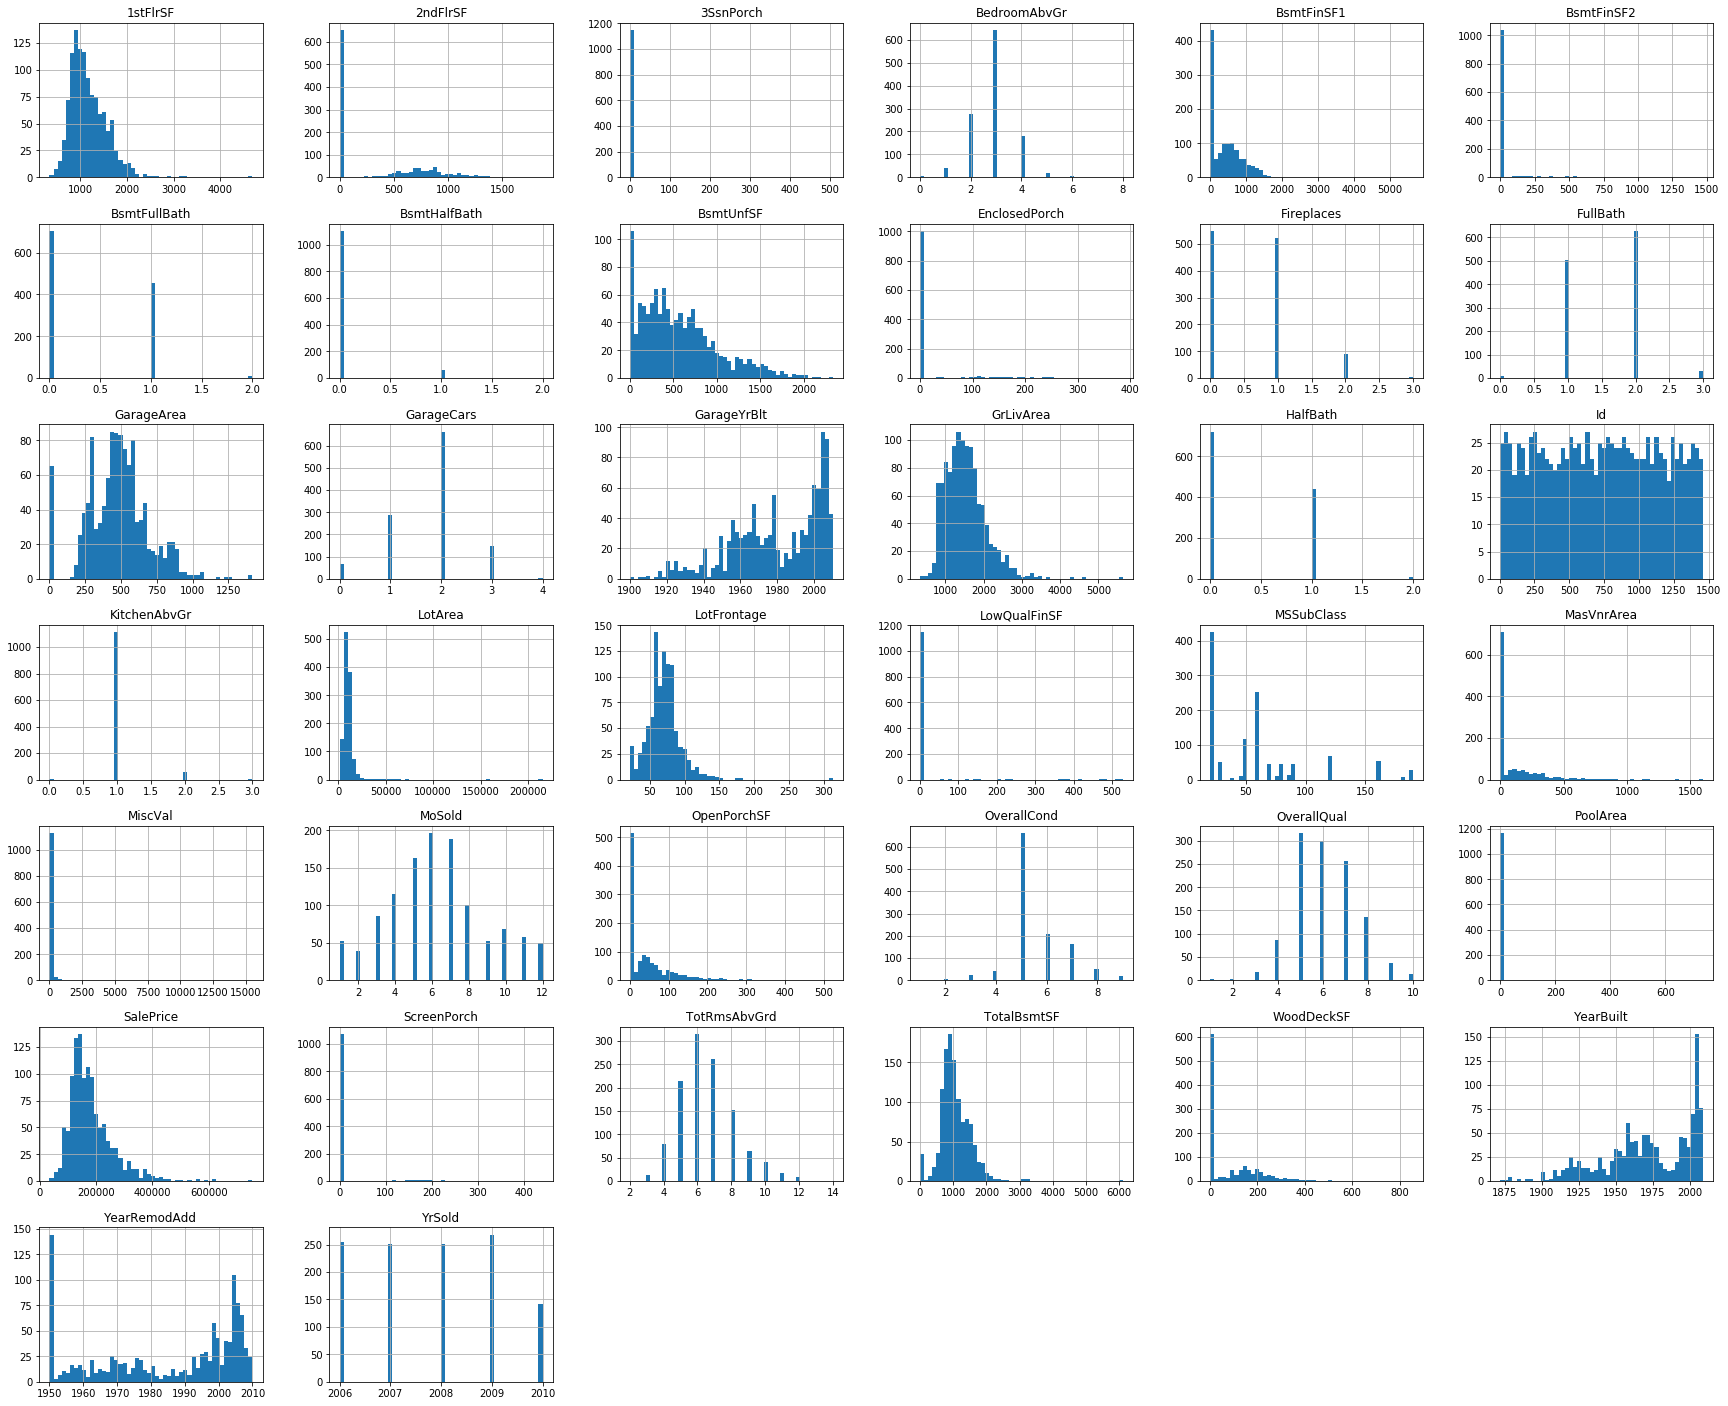

In [13]:
# Plot a histogram for each numberical attribute in the dataset. Which attributes have outliers 

%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(30, 25),)
plt.show()

In [ ]:
# Which are the top 5 variables that have the highest positive correlation with SalePrice
sale Price > >lot area>Neighborhood>grLivingArea.most sold 6th floor>YearBuilt>Overall Condition>Year Sold


In [ ]:
#Which are the top 2 variables that have the highest negative correlation with SalePrice
GarageYrBlt>

In [9]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1128,1129,60,RL,59.0,11796,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,215000
749,750,50,RL,50.0,8405,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,98000
1313,1314,60,RL,108.0,14774,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,333168
1006,1007,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,163500
590,591,60,RL,64.0,8320,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,185900


In [15]:
housing['Neighborhood'].value_counts()

NAmes      185
CollgCr    124
OldTown     86
Edwards     76
Somerst     71
NridgHt     67
Gilbert     63
NWAmes      60
Sawyer      56
BrkSide     46
Crawfor     43
SawyerW     42
Mitchel     39
NoRidge     35
Timber      28
IDOTRR      27
ClearCr     24
SWISU       22
StoneBr     21
MeadowV     14
BrDale      13
Blmngtn     13
Veenker      6
NPkVill      6
Blueste      1
Name: Neighborhood, dtype: int64

In [16]:
housing = train_set.copy() 

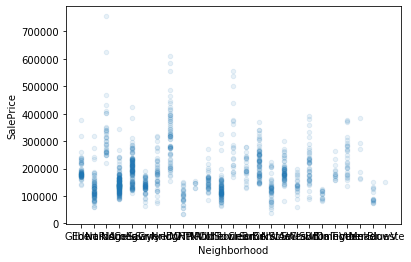

In [26]:
housing.plot(kind='scatter', x='Neighborhood', y='SalePrice',alpha=0.1)

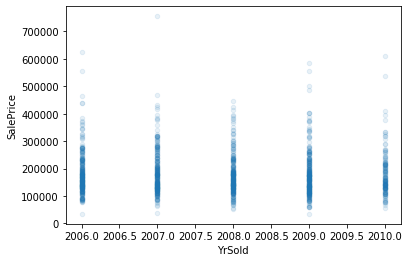

In [29]:
housing.plot(kind='scatter', x='YrSold', y='SalePrice', alpha=0.1)

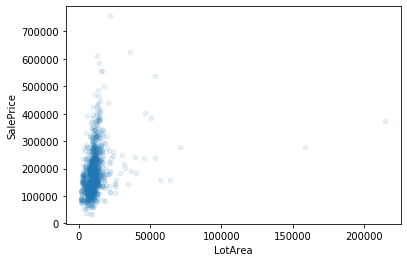

In [25]:
 housing.plot(kind='scatter', x='LotArea', y='SalePrice', alpha=0.1)

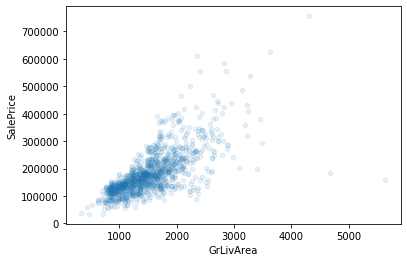

In [30]:
 housing.plot(kind='scatter', x='GrLivArea', y='SalePrice', alpha=0.1)

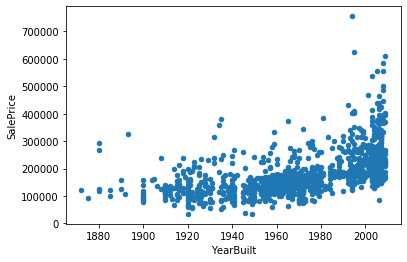

In [32]:
housing.plot(kind='scatter', x='YearBuilt', y='SalePrice')

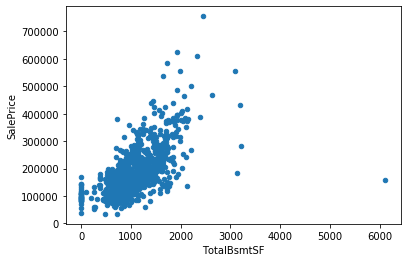

In [33]:
housing.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice')

In [39]:
housing.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1128,1129,60,RL,59.0,11796,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,215000


AttributeError: 'PathCollection' object has no property 'lable'

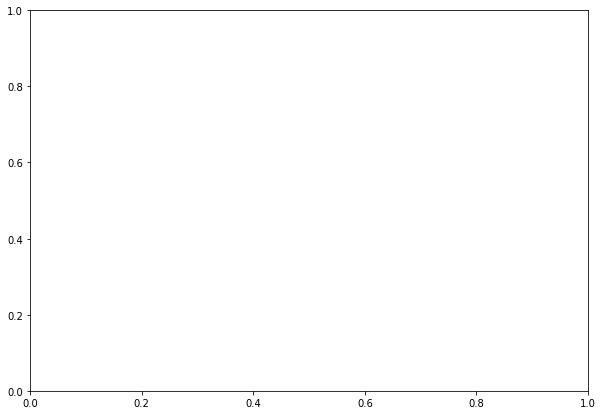

In [40]:
# Create a scatterplot with 4 dimensions (x axis, y axis, size and color) using any 4 meaningful variables.Create a scatterplot with 4 dimensions (x axis, y axis, size and color) using any 4 meaningful variables.

housing.plot(kind='scatter', x='MSSubClass', y='Id',alpha=0.1,
             s=housing['YrSold']/100, lable='YrSold', figsize=(10, 7),
             c='SalePrice',cmap=plt.get_cmap('jet'), colorbar=True)

In [41]:
corr_matrix = housing.corr() 
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.008972,-0.024737,-0.030214,-0.038301,0.034721,-0.027218,-0.025278,-0.045615,-0.010153,...,-0.029670,-0.009858,0.036153,-0.051382,0.002549,0.074822,-0.005532,-0.008038,-0.018178,-0.033647
MSSubClass,-0.008972,1.000000,-0.401738,-0.185914,0.019742,-0.044234,0.013409,0.044754,0.017949,-0.079804,...,-0.022378,0.022092,-0.013766,-0.043604,-0.016296,0.004538,-0.011124,-0.022681,-0.022064,-0.089967
LotFrontage,-0.024737,-0.401738,1.000000,0.432611,0.245027,-0.057994,0.140987,0.086024,0.222789,0.262666,...,0.088847,0.175057,-0.017436,0.074050,0.063920,0.162607,0.005927,-0.000768,0.013349,0.356195
LotArea,-0.030214,-0.185914,0.432611,1.000000,0.121483,-0.000981,0.021207,0.019593,0.121673,0.210956,...,0.113206,0.082777,-0.025631,0.026730,0.044355,0.082077,0.028567,0.003512,-0.007003,0.272555
OverallQual,-0.038301,0.019742,0.245027,0.121483,1.000000,-0.078102,0.598736,0.572209,0.423285,0.256165,...,0.230624,0.320994,-0.124655,0.034842,0.063527,0.033000,-0.032830,0.073521,-0.035593,0.799199
OverallCond,0.034721,-0.044234,-0.057994,-0.000981,-0.078102,1.000000,-0.384200,0.071961,-0.115498,-0.042072,...,-0.005774,-0.042326,0.111003,0.038165,0.028677,0.020617,0.074154,-0.014172,0.051305,-0.069796
YearBuilt,-0.027218,0.013409,0.140987,0.021207,0.598736,-0.384200,1.000000,0.595361,0.317233,0.251861,...,0.223826,0.225452,-0.387768,0.036145,-0.031770,0.015632,-0.035437,0.008093,-0.035821,0.534758
YearRemodAdd,-0.025278,0.044754,0.086024,0.019593,0.572209,0.071961,0.595361,1.000000,0.187700,0.133097,...,0.207098,0.255170,-0.187703,0.051214,-0.036927,-0.001758,-0.005130,0.021881,0.014006,0.518579
MasVnrArea,-0.045615,0.017949,0.222789,0.121673,0.423285,-0.115498,0.317233,0.187700,1.000000,0.285043,...,0.152002,0.149811,-0.103104,0.017348,0.079429,0.028271,-0.031127,-0.000184,-0.022912,0.507512
BsmtFinSF1,-0.010153,-0.079804,0.262666,0.210956,0.256165,-0.042072,0.251861,0.133097,0.285043,1.000000,...,0.192272,0.121047,-0.094453,0.028244,0.071895,0.121735,0.003850,-0.011223,0.024579,0.372164


In [42]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.799199
GrLivArea        0.701876
GarageCars       0.643687
GarageArea       0.615981
TotalBsmtSF      0.614481
1stFlrSF         0.599165
FullBath         0.565718
TotRmsAbvGrd     0.536014
YearBuilt        0.534758
YearRemodAdd     0.518579
MasVnrArea       0.507512
GarageYrBlt      0.487559
Fireplaces       0.459149
BsmtFinSF1       0.372164
LotFrontage      0.356195
WoodDeckSF       0.325838
2ndFlrSF         0.323506
OpenPorchSF      0.307019
HalfBath         0.284271
LotArea          0.272555
BsmtUnfSF        0.239368
BsmtFullBath     0.224958
BedroomAbvGr     0.170044
ScreenPorch      0.104080
3SsnPorch        0.053280
MoSold           0.050573
PoolArea         0.023641
BsmtFinSF2      -0.006591
BsmtHalfBath    -0.018110
MiscVal         -0.025161
YrSold          -0.025959
Id              -0.033647
OverallCond     -0.069796
LowQualFinSF    -0.076045
MSSubClass      -0.089967
EnclosedPorch   -0.123809
KitchenAbvGr    -0.147295
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E8EA03388>,
      dtype=object)

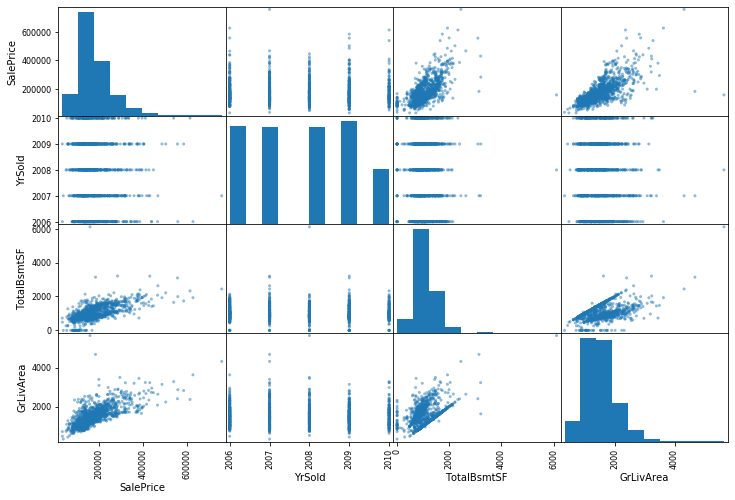

In [43]:
from pandas.plotting import scatter_matrix

attributes = ['SalePrice', 'YrSold', 'TotalBsmtSF', 'GrLivArea']

scatter_matrix(housing[attributes], figsize=(12, 8))